## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#데이터 로드
df_2020 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')
df_2021 = pd.read_csv('./data/자동차리콜현황(2021).csv', encoding='euc_kr')
df_2022 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='euc_kr')

In [4]:
# 데이터 병합

car = pd.concat([df_2020,df_2021,df_2022])


In [5]:
# 데이터 중복 여부 및 개수 확인
car.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4656 non-null   object
 1   차명        4656 non-null   object
 2   생산기간(부터)  4656 non-null   object
 3   생산기간(까지)  4656 non-null   object
 4   리콜개시일     4656 non-null   object
 5   리콜사유      4656 non-null   object
dtypes: object(6)
memory usage: 254.6+ KB


In [6]:
# 데이터 중복 처리(삭제)
car[car.duplicated(keep=False)]
car = car.drop_duplicates()

## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [7]:
temp1 = car.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)
temp1.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


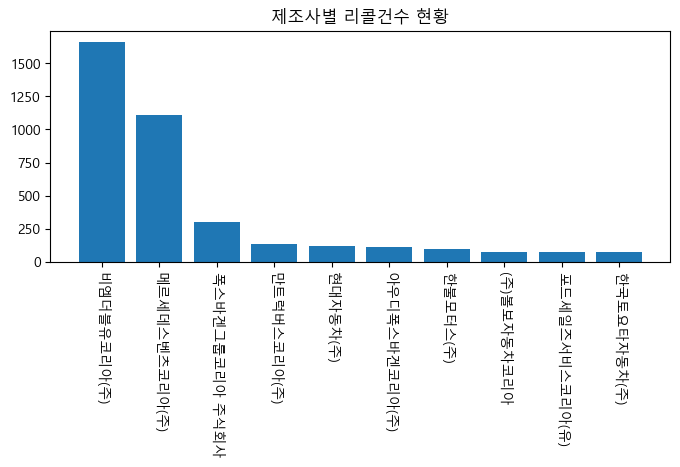

In [8]:
# 폰트
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

# 시각화 : Bar 그래프
import matplotlib.pyplot as plt
x = temp1.index
y = temp1['count']
plt.figure(figsize=(8,3))          
plt.bar(x=x,height=y)               
plt.xticks(rotation=270)            
plt.title('제조사별 리콜건수 현황')  
plt.show()

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [9]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
car['생산기간(부터)'] = pd.to_datetime(car['생산기간(부터)'])
car['생산기간(까지)'] = pd.to_datetime(car['생산기간(까지)'])
car['리콜개시일'] = pd.to_datetime(car['리콜개시일'])

car['사용기간'] = car['리콜개시일'] - car['생산기간(까지)']

car

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1469 days
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1470 days
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",176 days
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",139 days
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",141 days
...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63 days
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63 days
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,242 days
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,937 days


In [10]:
car['사용기간'].sort_values(ascending=False)

1020   8729 days
1016   8671 days
1017   8334 days
843    8039 days
1018   7816 days
          ...   
568      10 days
567      10 days
834       9 days
956       9 days
535       5 days
Name: 사용기간, Length: 4498, dtype: timedelta64[ns]

In [17]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
temp2 = car.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('days').head(10)
temp2

,days
제작자,
한신특장,3349 days 00:00:00
한국닛산(주),2501 days 11:04:36.923076928
비엠더블유코리아(주),2023 days 07:46:41.927710848
아이씨피(주),1902 days 00:00:00
(주)다산중공업,1665 days 00:00:00
한국지엠주식회사,1626 days 04:48:00
(주)에프엠케이,1466 days 01:36:00
지엠아시아퍼시픽지역본부 주식회사,1247 days 00:00:00
진일엔지니어링 주식회사,1201 days 20:00:00


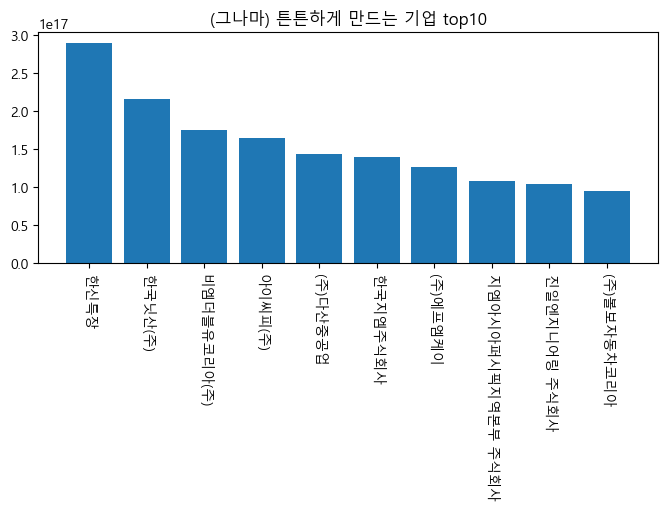

In [19]:
# 폰트
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

# 시각화 : Bar 그래프
import matplotlib.pyplot as plt
x = temp2.index
y = temp2['days']
plt.figure(figsize=(8,3))          
plt.bar(x=x,height=y)               
plt.xticks(rotation=270)            
plt.title('(그나마) 튼튼하게 만드는 기업 top10')  
plt.show()

In [20]:
# 제조사별 사용기간이 가장 짧은 순서대로 정렬
temp3 = car.groupby('제작자')['사용기간'].mean().sort_values(ascending=True).to_frame('days').head(10)
temp3

,days
제작자,
폴스타오토모티브코리아 유한회사,22 days 00:00:00
주식회사 케이에스티일렉트릭,113 days 00:00:00
명원아이앤씨(주),128 days 00:00:00
(유)기흥모터스,254 days 22:51:25.714285716
범한자동차 주식회사,261 days 18:00:00
(주) 바이크코리아,269 days 15:31:45.882352940
대전기계공업(주),328 days 04:30:00
볼보트럭코리아(주),332 days 07:12:00
(주)스포츠모터사이클코리아,348 days 21:00:00


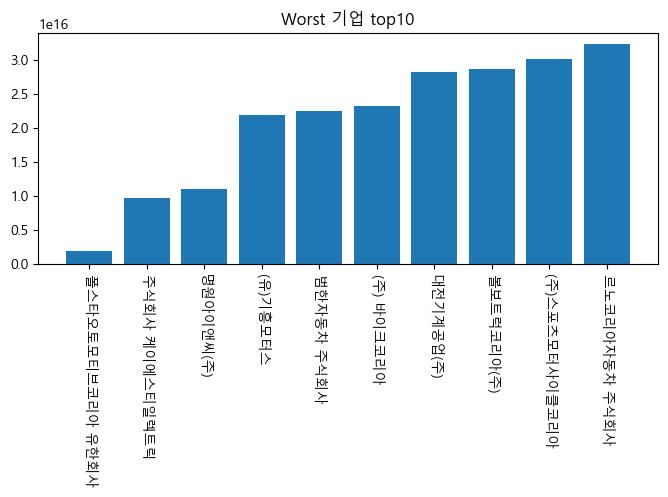

In [21]:
# 폰트
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

# 시각화 : Bar 그래프
import matplotlib.pyplot as plt
x = temp3.index
y = temp3['days']
plt.figure(figsize=(8,3))          
plt.bar(x=x,height=y)               
plt.xticks(rotation=270)            
plt.title('Worst 기업 top10')  
plt.show()

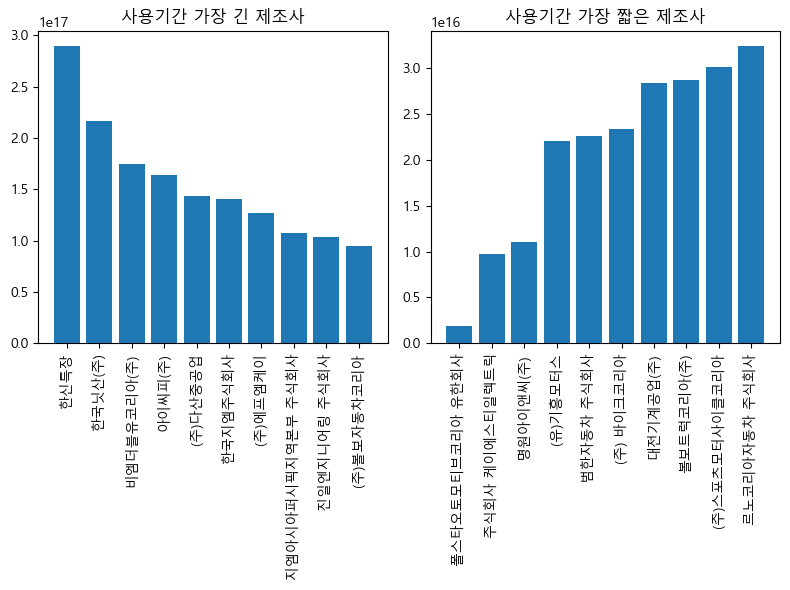

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐


plt.subplot(1, 2, 1)                # nrows=2, ncols=1, index=1
x = temp2.index
y = temp2['days']

plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 긴 제조사')     # 차트 제목 생성

plt.subplot(1, 2, 2)                # nrows=2, ncols=1, index=2
x = temp3.index
y = temp3['days']

plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 짧은 제조사')     # 차트 제목 생성

plt.tight_layout()
plt.show()



```
문제:그나마 튼튼 제조사 top 3는?
답: 폭스바겐, 비엠더블유, 벤츠
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [61]:
# 리콜건수가 가장 많은 제조사는?
temp4 = car.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
temp4.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [67]:
# 리콜 사유는?
car[car['제작자']=='비엠더블유코리아(주)']['리콜사유'].value_counts().sort_values(ascending=False)
#299건 : BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생산된 BMW 118d, 120d, 220d, 320d, 323d, 328d, 420d, 435d, 518d, 520d, 525d, 530d, 535d, 630d, 640d, 730d, 730Ld, 740d, 740Ld,750Ld, 840d, M550d, X1, X3, X4, X4 M40d, X5, X5 M50d, X6, X6 M50d, X7 모델 중 일부 차량에서 극히 드문 경우, 배기가스재순환장치(EGR) 쿨러의 제작결함이 발견 되었습니다.
reason = car[car['제작자']=='비엠더블유코리아(주)']['리콜사유']

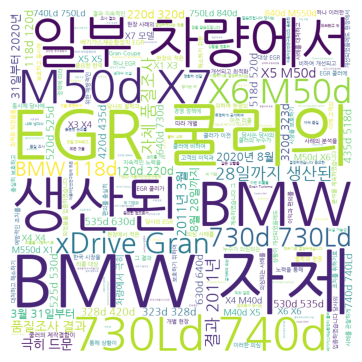

In [69]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

# caselist = car['리콜사유'].values
text = ' '.join(reason)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [72]:
# 주요 원인이 포함된 이유 상세 보기
car.loc[car['리콜사유'].str.contains('쿨러의')]['리콜사유'].value_counts()
# df[df['리콜사유'].str.contains('배기가스재순환장치|EGR|냉각수|쿨러의')]

리콜사유
BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생산된 BMW 118d, 120d, 220d, 320d, 323d, 328d, 420d, 435d, 518d, 520d, 525d, 530d, 535d, 630d, 640d, 730d, 730Ld, 740d, 740Ld,750Ld, 840d, M550d, X1, X3, X4, X4 M40d, X5, X5 M50d, X6, X6 M50d, X7 모델 중 일부 차량에서 극히 드문 경우, 배기가스재순환장치(EGR) 쿨러의 제작결함이 발견 되었습니다.                                                                                                                                              299
당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 되었음을 입증하였습니다. 당사의 철학과 경영 정책에 따라, 개별 현장 사례의 분석을 계속하였습니다. 그 결과, 지속적인 노력을 통해 상황이 개선되었음에도, 현장에서 적은 수이기는 하나 EGR 쿨러의 누수가 의심되는 사례를 관찰하게 되었습니다. 이에 고객의 이익과 편의를 충실히 보호하고, 동시에 당사에 매우 중요한 한국 시장을 보호하기 위하여, 현장의 적은 수이기는 하나 이러한 의심 사례를 대처하고 해소하기 위한 예방적인 조치를 취하기로 결정하였습니다. 중요한 점으로서, 당사는 귀 기관과 자동차안전연구원에 모든 것을 투명하게 공개하며, 위와 같은 상황을 명확히 전달 드려왔고, 귀 기관 및 자동차안전연구원과의 충분한 논의를 거친 후, 이번 리콜을 시행하기로 결정하였다는 점을 말씀드립니다.    239
Name: count, dtype: int64

In [74]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?
car.loc[car['리콜사유'].str.contains('쿨러의')]['차명'].value_counts()

차명
BMW 320d                   55
BMW 520d                   52
BMW 420d                   40
BMW 525d                   20
BMW 530d                   19
                           ..
BMW X5 xDrive25d            1
BMW 520d xDrive Touring     1
BMW 328d xDrive             1
BMW M550d                   1
BMW 750Ld                   1
Name: count, Length: 94, dtype: int64

```
리콜 주요 원인은? BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생산된 BMW 118d, 120d, 220d, 320d, 323d, 328d, 420d, 435d, 518d, 520d, 525d, 530d, 535d, 630d, 640d, 730d, 730Ld, 740d, 740Ld,750Ld, 840d, M550d, X1, X3, X4, X4 M40d, X5, X5 M50d, X6, X6 M50d, X7 모델 중 일부 차량에서 극히 드문 경우, 배기가스재순환장치(EGR) 쿨러의 제작결함이 발견 되었습니다.

그래서, 가장 나쁜 모델은? BMW 320d, BMW 520d, BMW 420d

```